   # Titanic: Analysis of a Disaster




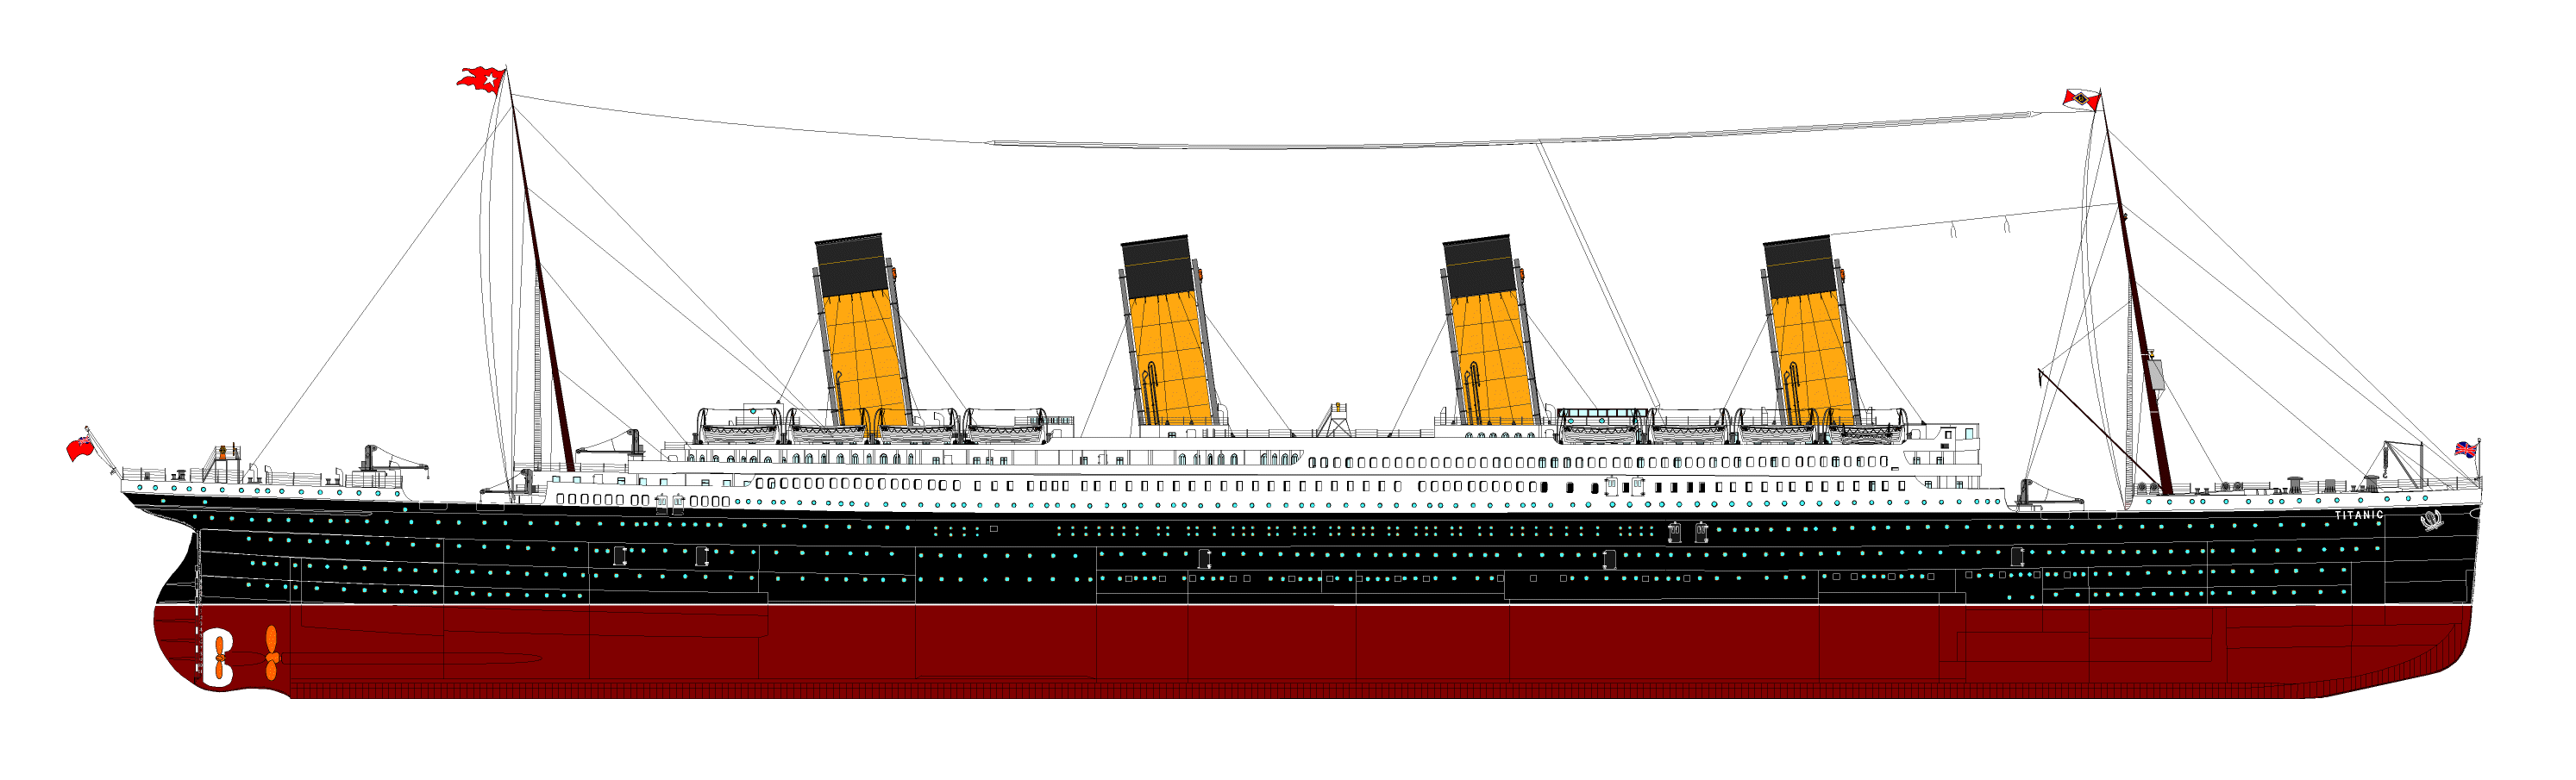

# Data set description

This is a famous data set in the kaggle community. This data set is involved in the Titanic ML Competition which is described as the best first challange for a beginner to dive into the ML. Even though the aim of this competition is predicting which passengers survived the Titanic shipwreck, for the purpose of this Course I am going just to do all the steps in the machine learning workflow that preceeds the actual training of the model.

## Data Dictionary

Variable | Definition | Key
---------|------------|------
**survival** |If the person survived or not|0 = No, 1 = Yes
**pclass**   |Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd 
**sex**      |Sex|
**Age**      |Age in years|
**sibsp**    |# of siblings / spouses aboard the Titanic|
**parch**    |# of parents / children aboard the Titanic|
**ticket**   |Ticket number|
**fare**     |Passenger fare|
**cabin**    |Cabin number|
**embarked** |Port of Embarkation| C = Cherbourg, Q = Queenstown, S = Southampton




### Variable Notes

* **pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
* **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* **sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
* **parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Loading the Data

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Loading the data set. 
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coursera - Exploratory Data Analysis for Machine Learning/Final Project/train.csv")
# data_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coursera - Exploratory Data Analysis for Machine Learning/Final Project/test.csv")
data_copy=data.copy()
# data=data_1.append(data_2)

# Let's give a peak at the data in order to be sure that everything is loaded correctly
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [174]:
# there are 891 unique values for PassengerId, this is a column I could safely remove
len(data.PassengerId.unique())
#data=data.drop(['PassengerId'],axis=1)

891

**Observation #1:**
The `PassengerId` Column doesn't carry useful information since it's just a progressive number. I delete It because I don't need It

# Data set exploration 

## Data set exploration Plan
I am going to esplore the Data Set in two ways:
- **Statistically** - I am going to find all the useful stats about the data set as
  - Column names, Column types, \# observations, \# columns, dtype of the    columns
  - Mean, Median, Interquartile ranges, Min/Max range, standard deviation
  - Correlation Matrix
- **Visually** - Printing the data visually makes it clearer the understanding of patterns and correlations that might exist in the data.
  - Histograms
  - Scatter Plots
  - Pie Charts
  - Box Plots
  - Bar Plots
  

## Summary of the Data

Text(0.5, 1.0, 'Missing values heatmap')

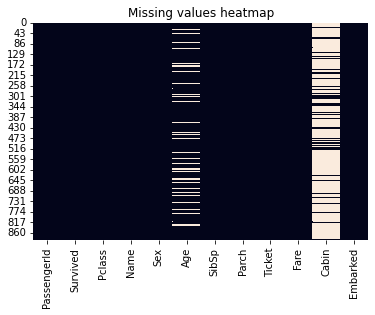

In [175]:
# That's a heatmap of the missing values for each column. The missing values are represented in white.
# This plot Is done using seaborn library
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observation #2:**
Thare are alot of null values in the `Cabin` Column, and a considerable amount in `Age` Column. These are things to be accounted in the Data Transfrmation stage. `Embarked` has only a missing value, I could drop the row since it is a single observation or preserve it by filling the missing value.

In [177]:
data_stats=data.describe().T
data_stats['range'] = data_stats['max']-data_stats['min'] # new column 'range'
data_stats=data_stats.rename(columns={'50%':'median'}) # '50%' ->'median'
data_stats


,count,mean,std,min,25%,median,75%,max,range
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,890.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,2.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


*According to train.csv, the youngest onboard was a 5 months baby. The oldest 80 years old*

**Observation #3:**
The first thing I noticed in these stats is the max value for the `Fare` column. It was very different compared to the average. In the beginning I thought that there must be an outlier throwing my mean off, but after I observed that it was a legit Fare. Those cabins, B51,53,55 were one of the most expensive. Since It affect only 3 observations, I think I could remove these values afterwards.

In [178]:
data.groupby(['Sex']).agg([np.mean, np.median])

PassengerId         Survived         ...     Parch              Fare       
              mean median      mean median  ...      mean median       mean median
Sex                                         ...                                   
female  431.028662  414.5  0.742038      1  ...  0.649682      0  44.479818   23.0
male    454.147314  464.0  0.188908      0  ...  0.235702      0  25.523893   10.5

[2 rows x 14 columns]

**Observation #4:**
the arithmetic mean is the only value that can be mislead by the presence of an outlier. Conversely the median is not influenced. I am reporting those values for each column to see if there are huge differences between them. If that's the case, this could indicate that there is an outlier, otherwise if the median and the arithmetic mean are close, there shouldn't be any.

In fact if we observe the difference between mean and median for the Fare column we can see that the mean is considerably larger. This is due to the expensive tickets discssed above that lead the mean to increase.

In [179]:
# Sorting the data by ticket I am able to see who are the people who travelled toghether
data.sort_values(by=['Ticket'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.550,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.500,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S


**Observaton #5:**
That was quite interesting. Different family members could travel under the same ticket number. Here, ordering the rows by ticket number I gave a look to some of these families since the members of the same family are now consecutive in the DataFrame.

In [180]:
# I want to see the richest peoples who bought the most expensive tickets
data[data['Fare']>400] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


At first I tought that there was an outlier in the Fare column. Afterwards i discovered the story behind these expensive tickets. They belonged to [Thomas Drake Martinez Cardeza](https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html) a very wealthy banker who travelled with his wife, mother and his manservant.

**Observation #6:**
Some columns are `object`. This will require on-hot encoding for the coluns I'll decide to keep.

## Scatter plots


Since seaborn provided this pairplot function, I've found unuseful doing histograms and scatterplots about the same things. With a simple line of code I've generated all of them.

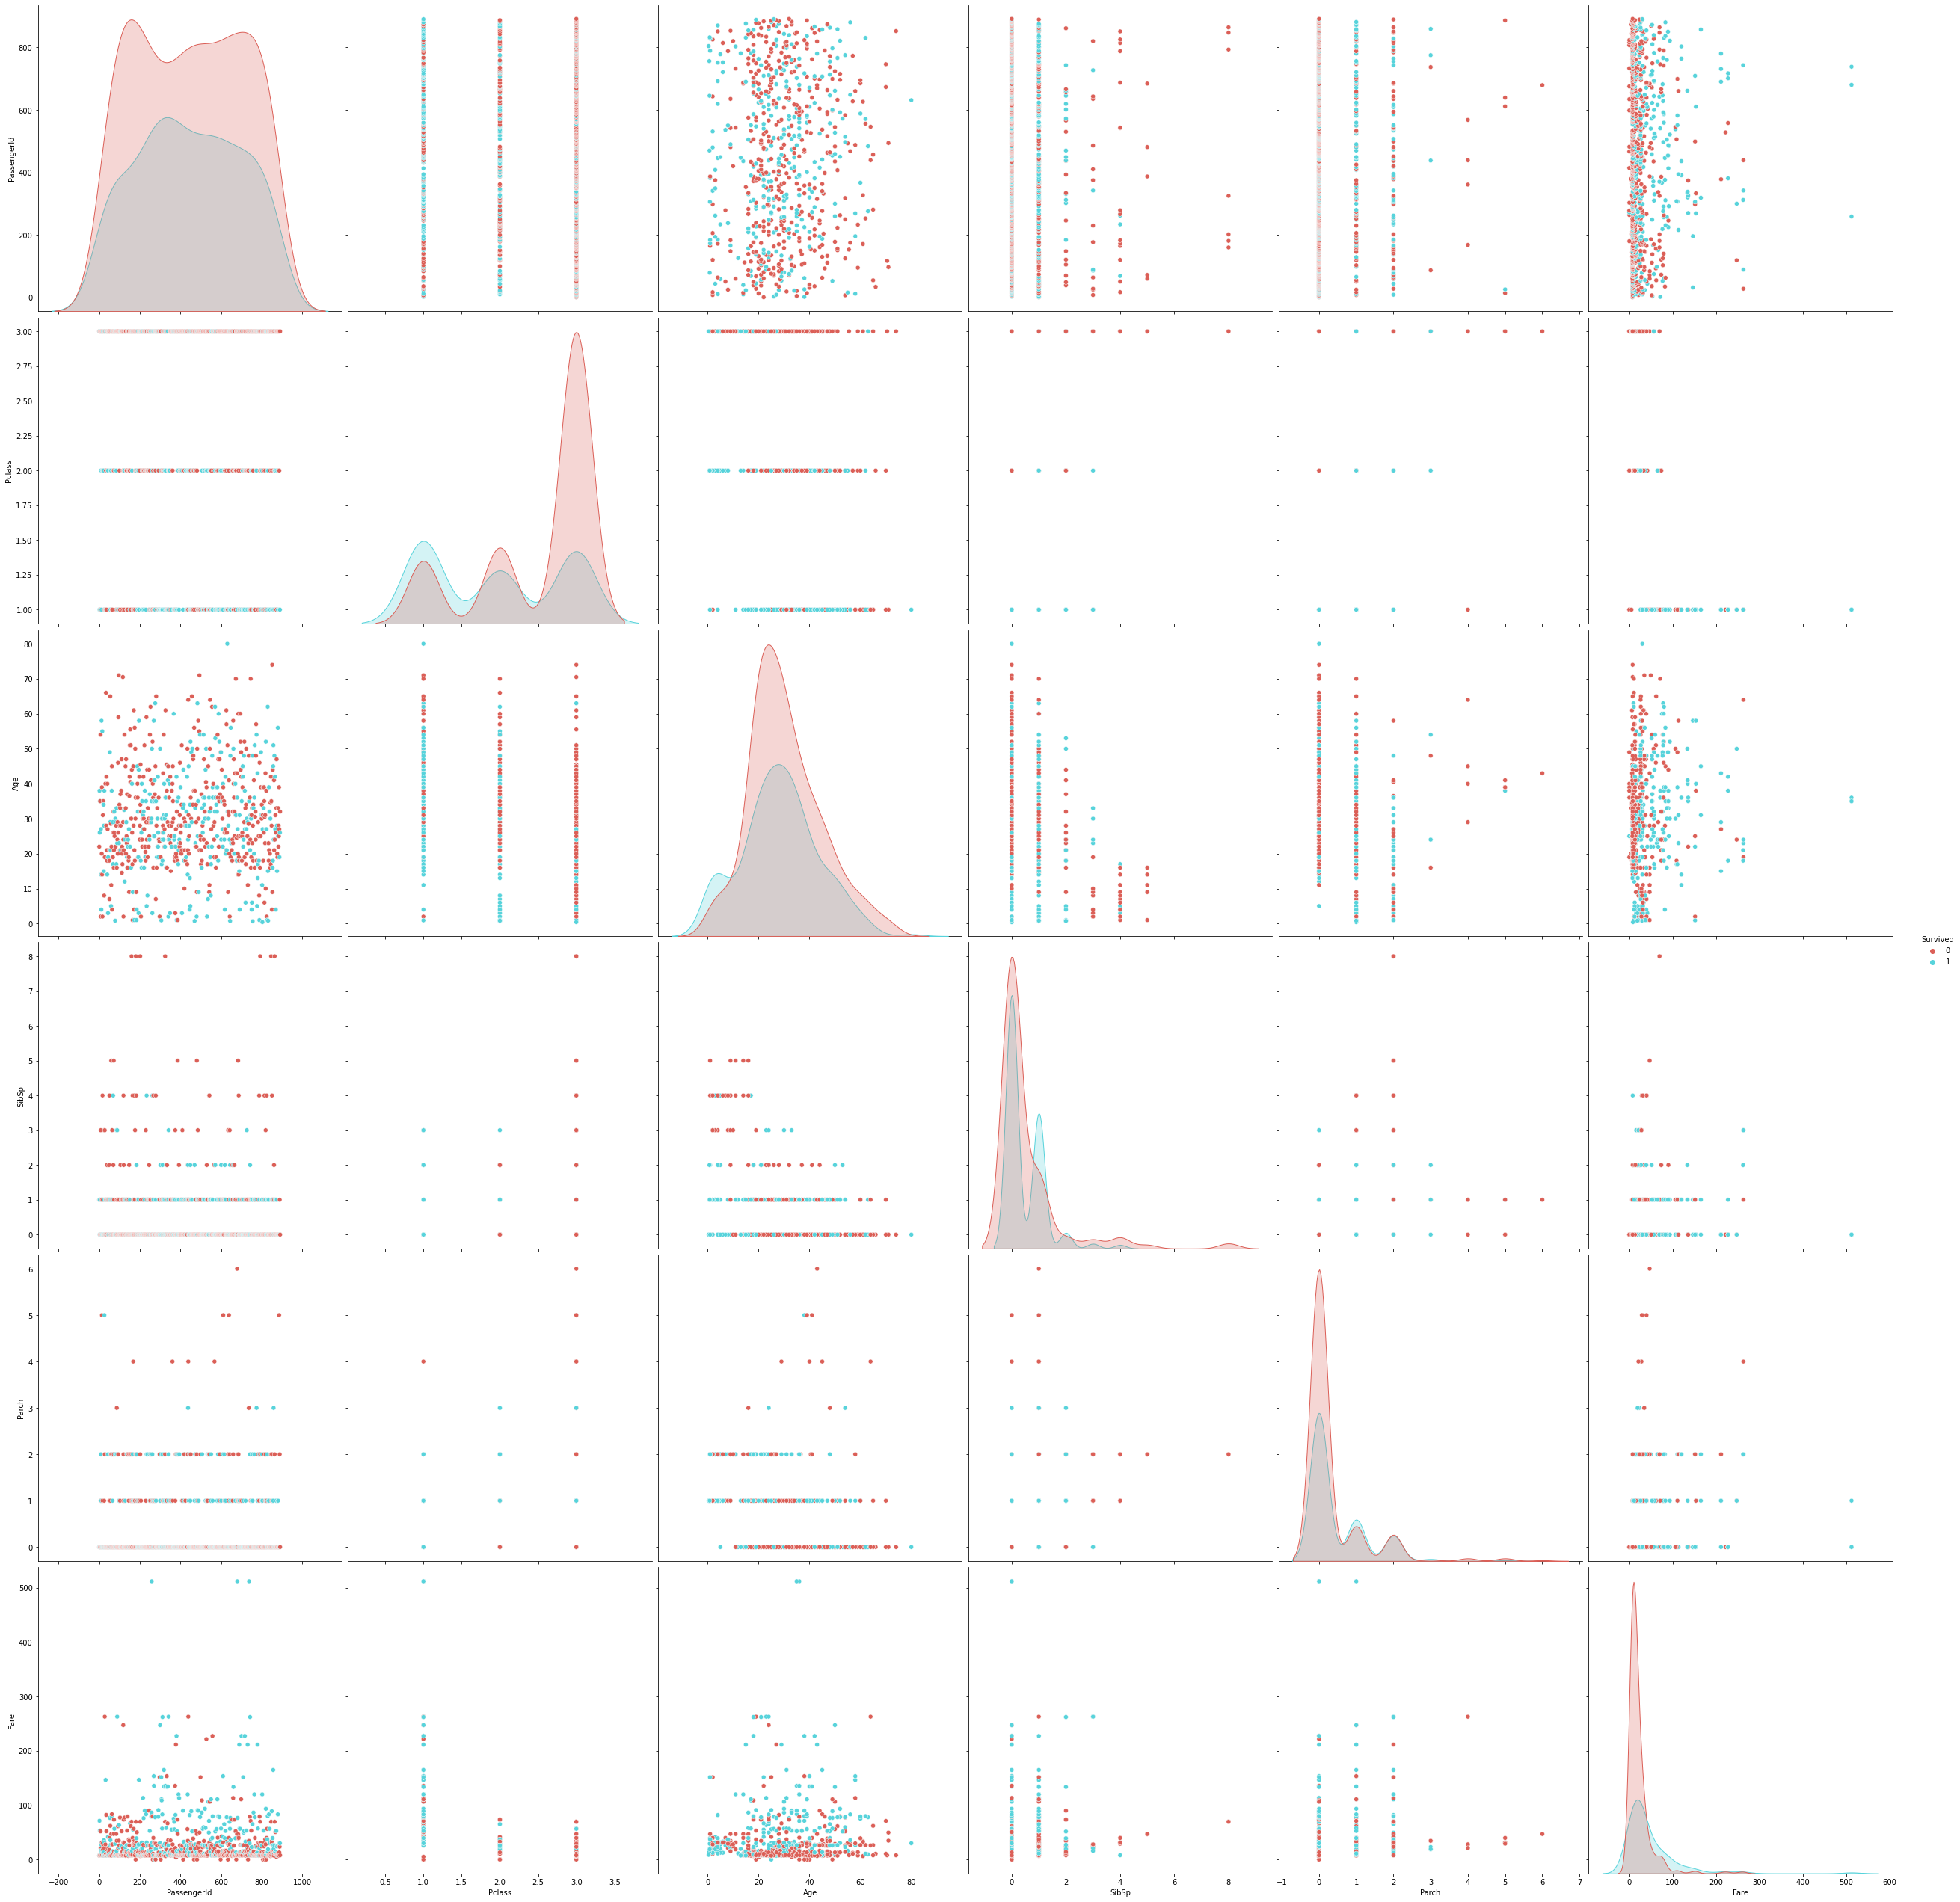

In [181]:
sns.pairplot(data,hue='Survived',height=6,palette=sns.color_palette("hls", 2))

## Histograms

In [182]:
# I want to see the class of those who had a free ride. The hypotesis is that all the free rides where for first class members
data[data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


**Observation #7:**
There are free tickets also for third class members because they were American Lines employees (LINE) and they've been offered the ticket for [free](https://www.encyclopedia-titanica.org/titanic-survivor/william-henry-tornquist.html)

In [183]:
(data[data['Fare']==0]).value_counts('Pclass').sort_index()

Pclass
1    5
2    6
3    4
dtype: int64

Text(0, 0.5, 'Frequency')

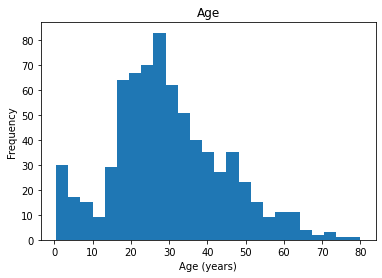

In [184]:
plt.hist(data.Age,bins=25)
plt.title("Age")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")

**Observation #8:**
The majority of people on the Titanic was under 30.

## Pie charts

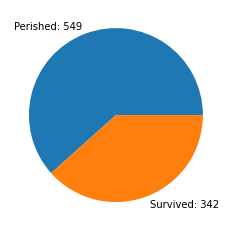

In [185]:
survived=data.value_counts('Survived').to_list()
mylabels = ["Perished: "+str(survived[0]), "Survived: "+str(survived[1])]
plt.pie(survived,labels=mylabels)
plt.show()


**Observation #9:**
The 61% of people died. The 39% survived.


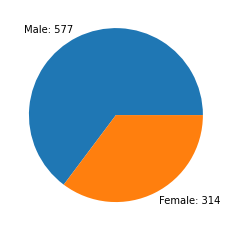

In [186]:
sex=data.value_counts('Sex').to_list()
mylabels = ["Male: "+str(sex[0]), "Female: "+str(sex[1])]
plt.pie(sex,labels=mylabels)
plt.show()

**Observation #10:**
The 64% of the passengers were male vs. 36% female

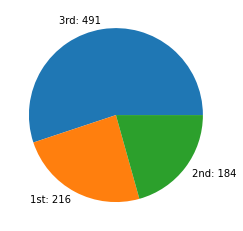

In [187]:
classes=data.value_counts('Pclass').to_list()
mylabels = ["3rd: "+str(classes[0]), "1st: "+str(classes[1]), "2nd: "+str(classes[2])]
plt.pie(classes,labels=mylabels)
plt.show()

**Observation #11:**
- 55% Third Class.
- 21% Second Class.
- 24% First Class.


## Box plot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

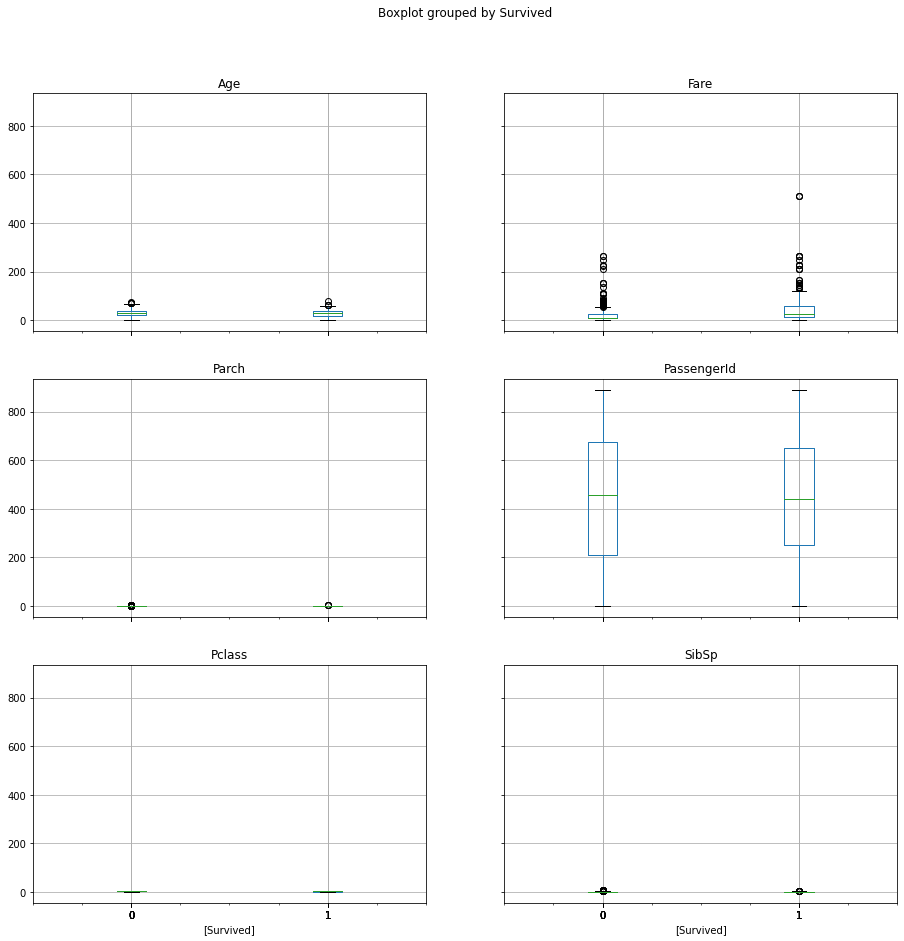

In [188]:
data.boxplot(by='Survived',figsize=(15,15));

# Data Cleaning & Feature Engineering

## Bar Plots

At this point I did very little or no data cleaning. In this section I am going to tackle missing values, feature encoding, feature engineering in order to find some useful correlations that could carry a good predicition power.

In [189]:
# I create a new feature named 'Family' So for every person I know how many people are in a relationship with it
data['Family']=data['SibSp']+data['Parch']

**Observation #12:**
Since the Columns `Sibsp` & `Parch` referres basically the number of relatives of a person, I created a new column called Family which indicates how many people travelled with that person.

In [190]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [191]:
data.value_counts('Family')

Family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

The majority of people travelled alone.

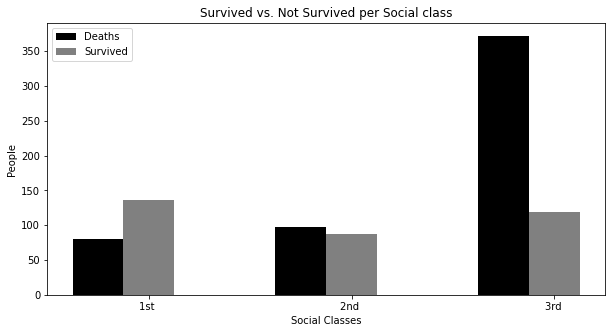

In [192]:
# Declaring the figure
plt.figure(figsize=[10, 5])

# Data to be plotted
survived =data[data['Survived']==1].value_counts('Pclass').sort_index().to_list() # all the survived, per class, into a list
not_survived=data[data['Survived']==0].value_counts('Pclass').sort_index().to_list()

# Using numpy to group 3 different data with bars
X = np.arange(3)

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, not_survived, color = 'black', width = 0.25)
plt.bar(X + 0.25, survived, color = 'gray', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Deaths', 'Survived'])

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(3)], ['1st ', '2nd ', '3rd '])

# Giving the tilte for the plot
plt.title("Survived vs. Not Survived per Social class")
# Namimg the x and y axis
plt.xlabel('Social Classes')
plt.ylabel('People')
# Saving the plot as a 'png'
plt.savefig('SvNSpsc.png')

# Displaying the bar plot
plt.show()

**Observation #13:**
- 1st class members are the only one where the number of people who survived are more than the dead ones. Is It because of a "rich folks first" thought? or because the icebarg struck where the 3rd class cabins were located?
- 3rd class members had the worst.

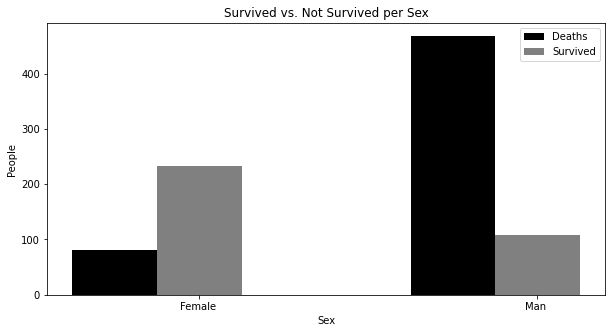

In [193]:
# Declaring the figure
plt.figure(figsize=[10, 5])

# Data to be plotted
survived =data[data['Survived']==1].value_counts('Sex').sort_index().to_list() # all the survived, per class, into a list
not_survived=data[data['Survived']==0].value_counts('Sex').sort_index().to_list()

# Using numpy to group 3 different data with bars
X = np.arange(2)

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, not_survived, color = 'black', width = 0.25)
plt.bar(X + 0.25, survived, color = 'gray', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Deaths', 'Survived'])

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(2)], ['Female ', 'Man '])

# Giving the tilte for the plot
plt.title("Survived vs. Not Survived per Sex")
# Namimg the x and y axis
plt.xlabel('Sex')
plt.ylabel('People')
# Saving the plot as a 'png'
plt.savefig('SvNSps.png')

# Displaying the bar plot
plt.show()

**Observation #14:**
- The females survived the most. Is It because of "first womans and childs" thought?

Here I wanted to see how many people in these Age ranges were on the ticanic, and afterwrds, how many of them survived vs. perished. Basically I was interested in discovery if the babies were really saved first.

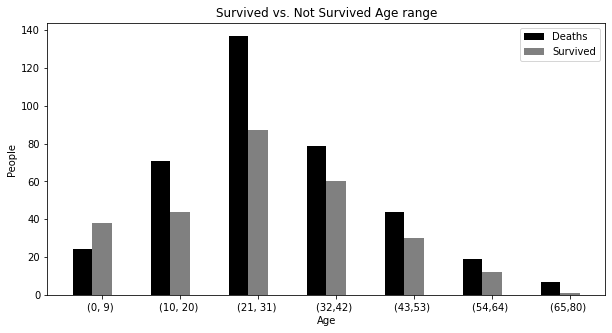

In [194]:
# I want to see if the babies were really saved first
bins = pd.IntervalIndex.from_tuples([(0, 9), (10, 20), (21, 31), (32,42), (43,53),(54,64),(65,80) ])
# Declaring the figure
plt.figure(figsize=[10, 5])

# Data to be plotted
survived =pd.cut(data[data['Survived']==1].Age.to_list(),bins).value_counts().sort_index().to_list() 
not_survived=pd.cut(data[data['Survived']==0].Age.to_list(),bins).value_counts().sort_index().to_list()

# Using numpy to group 7 different data with bars
X = np.arange(7)

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, not_survived, color = 'black', width = 0.25)
plt.bar(X + 0.25, survived, color = 'gray', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Deaths', 'Survived'])

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(7)], ['(0, 9) ', '(10, 20) ','(21, 31) ','(32,42) ','(43,53) ','(54,64) ','(65,80) '])

# Giving the tilte for the plot
plt.title("Survived vs. Not Survived Age range")
# Namimg the x and y axis
plt.xlabel('Age')
plt.ylabel('People')
# Saving the plot as a 'png'
plt.savefig('SvNSpa.png')

# Displaying the bar plot
plt.show()

**Observation #15:**

We can see that in the range 0-9 years of Age, this is the only range where people survived the most. So it is plausible to think that the rule "babies and woman first" was really observed.

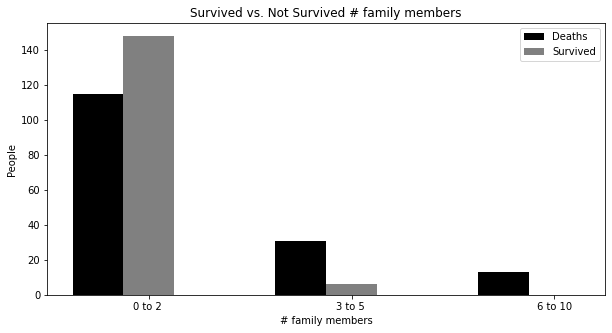

In [195]:
# I want to see how many people lived and survived according to the number of the family members
bins = pd.IntervalIndex.from_tuples([(0, 2), (3, 5), (6, 10)])
# Declaring the figure
plt.figure(figsize=[10, 5])

# Data to be plotted
survived =pd.cut(data[data['Survived']==1].Family.to_list(),bins).value_counts().sort_index().to_list()
not_survived=pd.cut(data[data['Survived']==0].Family.to_list(),bins).value_counts().sort_index().to_list()

# Using numpy to group 3 different data with bars
X = np.arange(3)

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, not_survived, color = 'black', width = 0.25)
plt.bar(X + 0.25, survived, color = 'gray', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Deaths', 'Survived'])

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(3)], ['0 to 2 ', '3 to 5 ','6 to 10'])

# Giving the tilte for the plot
plt.title("Survived vs. Not Survived # family members")
# Namimg the x and y axis
plt.xlabel('# family members')
plt.ylabel('People')
# Saving the plot as a 'png'
plt.savefig('SvNSpfm.png')

# Displaying the bar plot
plt.show()

**Observation #16:**
This shows that if you travelled with lass than 3 family members your chances of survival increased exponentially.

## Filling missing values

Filling in of the age

In [196]:
# I must first fill the NA Ages in order to give to them a class in the following lines of code.
# I want to calculate the mode from the ages that are present. First of all i need to extract
# Te wors where the age is not null

#Equivalent version of finding the mode.
#import statistics as st
#st.mode((data[data.Age.notnull()]).Age.to_list()) 

#I prefer this method because that way I can see the mode as well the 2nd and 3rd most frequent values
(data[data.Age.notnull()]).value_counts('Age') 

Age
24.00    30
22.00    27
18.00    26
30.00    25
19.00    25
         ..
53.00     1
55.50     1
66.00     1
70.50     1
0.42      1
Length: 88, dtype: int64

In [197]:
data["Age"].fillna(24, inplace = True)

Filling in Embarked

Since ‘Embarked’ only had two missing values and the largest number of commuters embarked from Southampton, the probability of boarding from Southampton is higher. So, we fill the missing values with Southampton. However, instead of manually putting in Southampton, we would find the mode of the Embarked column and substitute missing values with it.
The mode is the most frequently occurring element in a series.

In [198]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

## Feature engineering


New Feature 'Is_Alone'

I added this new column `Is_Alone` in order to see if there is a strong correlation between being alone and the chances of surviving.

In [199]:
data['Is_Alone'] = data.Family == 0

New Feature 'Youth'

**Observation #17**
I added a Youth feature which indicates the range of age in which the person fall. I did this since It was observed that people between 21 and 31 years old where the ones who perished the most.

The ranges of youth are:
- 0 to 9   -> Child
- 10 to 20 -> Teenager
- 21 to 31 -> Adult
- 32 to 55 -> Senior
- 56 to 80 -> Old

In [200]:
# With this code I get a new Column called Youth. The problem is that the type of the column is categorial. 
# So I needed to convert all the values to integers. I did that with the second line below 

data["Youth"]=pd.cut(data['Age'], bins=[0,9,20,31,55,80], labels=["Child","Teenager","Adult","Senior","Old"])
#data["Youth"] = data["Youth"].astype('category').cat.codes
data["Youth"] = data["Youth"].astype('str') 



---



## Encoding & dropping of columns

I use LabelEncoder from Sklearn to encode the Male/Female lables automatically. LabelEncoder gives a unique number for every label values it finds in the given column.

In [201]:
le = preprocessing.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [202]:
le = preprocessing.LabelEncoder()
data['Is_Alone'] = le.fit_transform(data['Is_Alone'])



---



I drop the columns i do not need

In [203]:
data=data.drop(['Ticket','Name','Cabin'],axis=1)

In [204]:
data.value_counts("Youth")

Youth
Adult       426
Senior      246
Teenager    117
Child        62
Old          40
dtype: int64

I convert the categorical data wit one-hot encoding

In [205]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=False)

In [206]:
data = pd.get_dummies(data, columns=['Youth'], drop_first=False)

In [207]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Is_Alone,Embarked_C,Embarked_Q,Embarked_S,Youth_Adult,Youth_Child,Youth_Old,Youth_Senior,Youth_Teenager
0,1,0,3,1,22.0,1,0,7.2500,1,0,0,0,1,1,0,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0
2,3,1,3,0,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0
4,5,0,3,1,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,1,0,0,1,1,0,0,0,0
887,888,1,1,0,19.0,0,0,30.0000,0,1,0,0,1,0,0,0,0,1
888,889,0,3,0,24.0,1,2,23.4500,3,0,0,0,1,1,0,0,0,0
889,890,1,1,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0,0,0


## Correlations among the features

In [208]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Is_Alone,Embarked_C,Embarked_Q,Embarked_S,Youth_Adult,Youth_Child,Youth_Old,Youth_Senior,Youth_Teenager
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036186,-0.057527,-0.001652,0.012658,-0.040143,0.057462,-0.001205,-0.033606,0.022204,-0.023900,-0.022602,-0.006575,0.037353,0.006964
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307,0.016639,-0.203367,0.168240,0.003650,-0.149683,-0.090161,0.128812,-0.037375,0.049432,-0.006212
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500,0.065997,0.135207,-0.243292,0.221009,0.074053,0.181548,0.104857,-0.203322,-0.249140,0.106933
Sex,0.042939,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333,-0.200988,0.303646,-0.082853,-0.074115,0.119224,0.038227,-0.075254,0.057823,0.003645,-0.040120
Age,0.036186,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554,-0.236339,0.151002,0.025811,-0.071806,0.022577,-0.253093,-0.507549,0.555198,0.567762,-0.335232
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651,0.890712,-0.584471,-0.059528,-0.026354,0.068734,-0.083179,0.330474,-0.073376,-0.083505,0.029573
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225,0.783111,-0.583398,-0.011069,-0.081228,0.060814,-0.193999,0.346810,-0.021958,0.015980,0.017958
Fare,0.012658,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000,0.217138,-0.271832,0.269335,-0.117216,-0.162184,-0.119496,-0.008962,0.058829,0.127542,-0.021407
Family,-0.040143,0.016639,0.065997,-0.200988,-0.236339,0.890712,0.783111,0.217138,1.000000,-0.690922,-0.046215,-0.058592,0.077359,-0.153769,0.399128,-0.061120,-0.049090,0.029183
Is_Alone,0.057462,-0.203367,0.135207,0.303646,0.151002,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.095298,0.086464,0.029074,0.198595,-0.327811,0.065264,-0.037259,-0.037453


This correlation table tells us that SibSp and Parch have a good correlation of 0.415141 meanwhile Pclass and Fare have a very good correlation of 0.604960

# Hypothesis formulation

*   Ho: µ Age_Survived == µ Age_Not_survived
*   Ha: µ Age_Survived != µ Age_Not_Survived



*   Ho: µ Fare_Survived == µ Fare_Not_survived
*   Ha: µ Fare_Survived != µ Fare_Not_Survived

*   Ho: µ Class_Survived == µ Class_Not_survived
*  Ha: µ Class_Survived != µ Class_Not_Survived

# Significance test

In [209]:
from scipy import stats
from scipy.stats import mstats
from locale import DAY_1

*   Ho: µ Age_Survived == µ Age_Not_survived
*   Ha: µ Age_Survived != µ Age_Not_Survived



In [210]:
data_copy['Age']=data_copy["Age"].fillna(24)
data_copy['Age'] = data_copy['Age'].astype(np.int64)
H, pval = mstats.kruskalwallis(data_copy[data_copy['Survived']==1].Age.to_list(),data_copy[data_copy['Survived']==0].Age.to_list())
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 0.47409198473728537
P-Value: 0.4911106630298028
Accept NULL hypothesis - No significant difference between groups.


*   Ho: µ Fare_Survived == µ Fare_Not_survived
*   Ha: µ Fare_Survived != µ Fare_Not_Survived

In [211]:
data_copy['Fare']=data_copy["Fare"].fillna(30)
data_copy['Fare'] = data_copy['Fare'].astype(np.int64)

H, pval = mstats.kruskalwallis(data_copy[data_copy['Survived']==1].Fare.to_list(),data_copy[data_copy['Survived']==0].Fare.to_list())
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 92.86163001934372
P-Value: 5.608129813369624e-22
Reject NULL hypothesis - Significant differences exist between groups.


*   Ho: µ Class_Survived == µ Class_Not_survived
*  Ha: µ Class_Survived != µ Class_Not_Survived

In [212]:
H, pval = mstats.kruskalwallis(data_copy[data_copy['Survived']==1].Pclass.to_list(),data_copy[data_copy['Survived']==0].Pclass.to_list())
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic: 102.6831333974126
P-Value: 3.932785644652686e-24
Reject NULL hypothesis - Significant differences exist between groups.


# Training of the model

I am going to use a random forest model.

In [216]:
from sklearn.ensemble import RandomForestClassifier

test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coursera - Exploratory Data Analysis for Machine Learning/Final Project/test.csv")
# Target variable
y = data["Survived"]

# Features I am taking into consideration
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = data[features]
# i make use of label encoder to encode male female tag in Sex of test.csv
X_test = test_data[features]
le = preprocessing.LabelEncoder()
X_test['Sex'] = le.fit_transform(X_test['Sex'])

# Creation of the random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
